자전거 대여 개수 예측모델 만들기

In [88]:
# 데이터 불러오기
import pandas as pd
train_df = pd.read_csv("../data/bike-sharing-demand/train.csv")
test_df = pd.read_csv("../data/bike-sharing-demand/test.csv")

데이터 EDA

In [89]:
# 데이터 탐색하기
train_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10886 entries, 0 to 10885
Data columns (total 12 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   datetime    10886 non-null  object 
 1   season      10886 non-null  int64  
 2   holiday     10886 non-null  int64  
 3   workingday  10886 non-null  int64  
 4   weather     10886 non-null  int64  
 5   temp        10886 non-null  float64
 6   atemp       10886 non-null  float64
 7   humidity    10886 non-null  int64  
 8   windspeed   10886 non-null  float64
 9   casual      10886 non-null  int64  
 10  registered  10886 non-null  int64  
 11  count       10886 non-null  int64  
dtypes: float64(3), int64(8), object(1)
memory usage: 1020.7+ KB


In [113]:
# 필요없는 칼럼 없애기, 데이터 결측치 처리하기
train_df = train_df.drop(columns = ['casual','registered'])
train_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10886 entries, 0 to 10885
Data columns (total 16 columns):
 #   Column      Non-Null Count  Dtype         
---  ------      --------------  -----         
 0   datetime    10886 non-null  datetime64[ns]
 1   season      10886 non-null  int64         
 2   holiday     10886 non-null  int64         
 3   workingday  10886 non-null  int64         
 4   weather     10886 non-null  int64         
 5   temp        10886 non-null  float64       
 6   atemp       10886 non-null  float64       
 7   humidity    10886 non-null  int64         
 8   windspeed   10886 non-null  float64       
 9   count       10886 non-null  int64         
 10  year        10886 non-null  int32         
 11  month       10886 non-null  int32         
 12  day         10886 non-null  int32         
 13  hour        10886 non-null  int32         
 14  weekday     10886 non-null  int32         
 15  is_weekend  10886 non-null  int64         
dtypes: datetime64[ns](1), 

In [ ]:
import pandas as pd
import numpy as np
train_df['datetime'] = pd.to_datetime(train_df['datetime'])

train_df['year'] = train_df['datetime'].dt.year
train_df['month'] = train_df['datetime'].dt.month
train_df['hour'] = train_df['datetime'].dt.hour
train_df['weekday'] = train_df['datetime'].dt.weekday
train_df['is_weekend'] = train_df['weekday'].isin([5, 6]).astype(int)

In [109]:
train_df['is_weekend'].value_counts()

is_weekend
0    7723
1    3163
Name: count, dtype: int64

In [111]:
train_df['workingday'].value_counts()

workingday
1    7412
0    3474
Name: count, dtype: int64

C:\Users\Admin\AppData\Local\Temp\ipykernel_12912\1293487326.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(train_df, x = 'year', y= 'count',palette='Set3')


<Axes: xlabel='year', ylabel='count'>

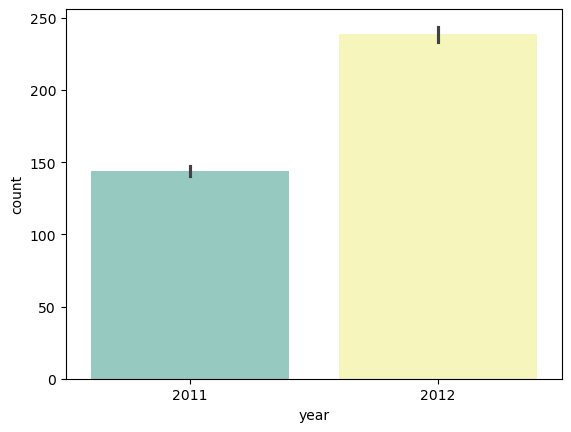

In [93]:
import seaborn as sns
sns.barplot(train_df, x = 'year', y= 'count',palette='Set3')

C:\Users\Admin\AppData\Local\Temp\ipykernel_12912\2125950812.py:1: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(train_df, x='month', y= 'count',palette="Set3")


<Axes: xlabel='month', ylabel='count'>

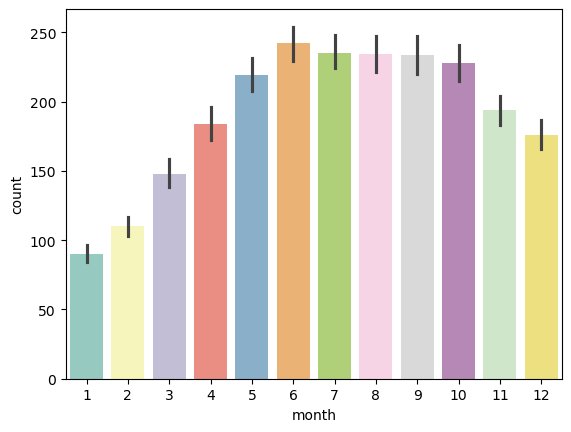

In [95]:
sns.barplot(train_df, x='month', y= 'count',palette="Set3")

<Axes: xlabel='hour', ylabel='count'>

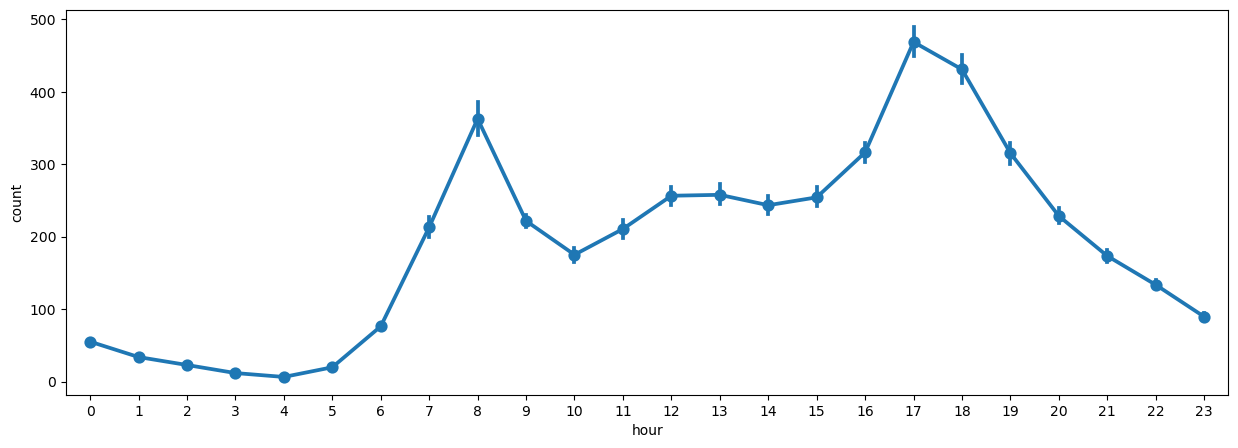

In [96]:
import matplotlib.pyplot as plt
plt.figure(figsize=(15,5))
sns.pointplot(x = 'hour', y= 'count',data = train_df)

In [98]:
from matplotlib import rcParams  # 폰트지정
rcParams['font.family'] = 'Gulim'
rcParams['axes.unicode_minus'] = False

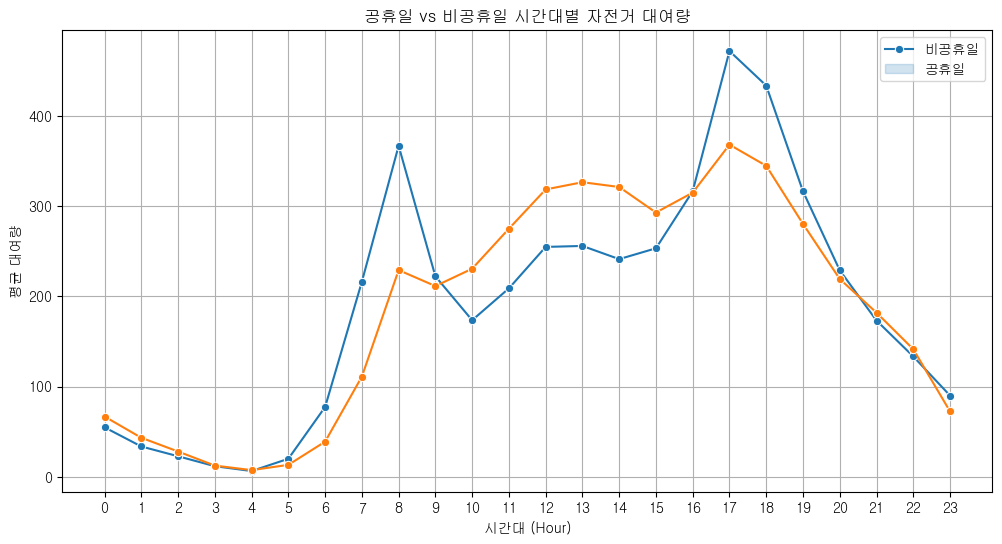

In [101]:
# 시간대가 없다면 추가
train_df['hour'] = train_df['datetime'].dt.hour

# 공휴일 여부 & 시간대별 그룹화
holiday_grouped = train_df.groupby(['holiday', 'hour'])['count'].mean().reset_index()

import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(12, 6))
sns.lineplot(data=holiday_grouped, x='hour', y='count', hue='holiday', marker='o')

plt.title('공휴일 vs 비공휴일 시간대별 자전거 대여량')
plt.xlabel('시간대 (Hour)')
plt.ylabel('평균 대여량')
plt.xticks(range(0, 24))
plt.legend(labels=['비공휴일', '공휴일'])
plt.grid(True)
plt.show()


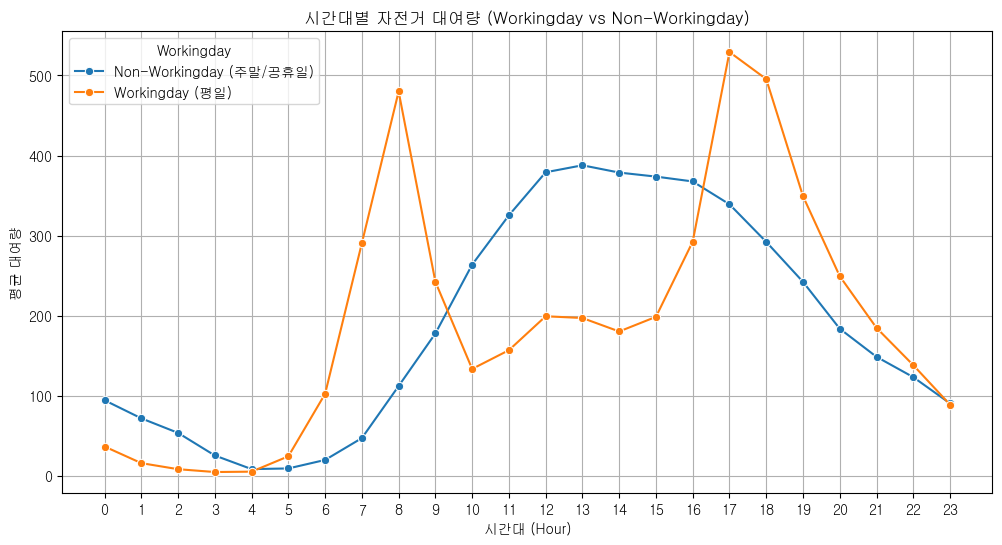

In [105]:
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(12, 6))

# 그래프 그리기
sns.lineplot(
    data=workingday_grouped,
    x='hour',
    y='count',
    hue='workingday',
    marker='o'
)

# 범례에 맞게 라벨 바꿔주기
plt.title('시간대별 자전거 대여량 (Workingday vs Non-Workingday)')
plt.xlabel('시간대 (Hour)')
plt.ylabel('평균 대여량')
plt.xticks(range(0, 24))

# 직접 이름 지정
handles, labels = plt.gca().get_legend_handles_labels()
new_labels = ['Non-Workingday (주말/공휴일)', 'Workingday (평일)']
plt.legend(handles=handles, labels=new_labels, title='Workingday')

plt.grid(True)
plt.show()


C:\Users\Admin\AppData\Local\Temp\ipykernel_12912\3622294521.py:1: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(train_df, x = 'season', y= 'count',palette='Set3')


<Axes: xlabel='season', ylabel='count'>

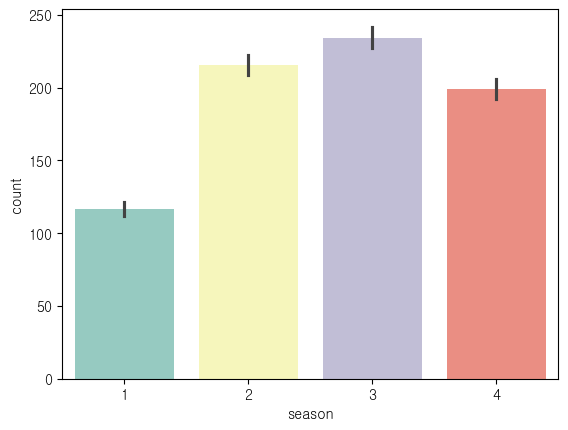

In [100]:
sns.barplot(train_df, x = 'season', y= 'count',palette='Set3')

상관관계분석하기

In [6]:
train_df.drop(columns='datetime').corr()

,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,count
season,1.000000,0.029368,-0.008126,0.008879,0.258689,0.264744,0.190610,-0.147121,0.163439
holiday,0.029368,1.000000,-0.250491,-0.007074,0.000295,-0.005215,0.001929,0.008409,-0.005393
workingday,-0.008126,-0.250491,1.000000,0.033772,0.029966,0.024660,-0.010880,0.013373,0.011594
weather,0.008879,-0.007074,0.033772,1.000000,-0.055035,-0.055376,0.406244,0.007261,-0.128655
temp,0.258689,0.000295,0.029966,-0.055035,1.000000,0.984948,-0.064949,-0.017852,0.394454
atemp,0.264744,-0.005215,0.024660,-0.055376,0.984948,1.000000,-0.043536,-0.057473,0.389784
humidity,0.190610,0.001929,-0.010880,0.406244,-0.064949,-0.043536,1.000000,-0.318607,-0.317371
windspeed,-0.147121,0.008409,0.013373,0.007261,-0.017852,-0.057473,-0.318607,1.000000,0.101369
count,0.163439,-0.005393,0.011594,-0.128655,0.394454,0.389784,-0.317371,0.101369,1.000000


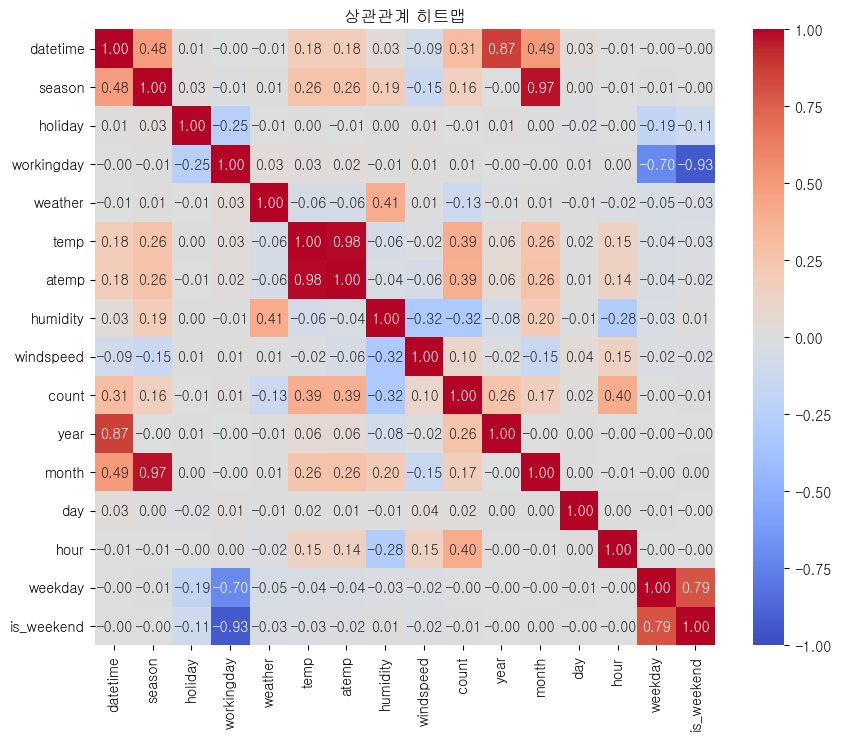

In [115]:
# 예: 자전거 대여 데이터에서 상관관계 계산
corr_matrix = train_df.corr()

import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 8))
sns.heatmap(
    corr_matrix,
    annot=True,      # 각 칸 숫자 표시
    fmt='.2f',       # 소수점 둘째자리
    cmap='coolwarm', # 색상 팔레트
    vmin=-1, vmax=1  # 상관계수 범위 고정
)

plt.title('상관관계 히트맵')
plt.show()



In [8]:
# temp와 atemp의 상관관계가 높아서 atemp(체감온도)는 삭제
train_df = train_df.drop(columns='atemp')

수치데이터 범주화 라벨링하기(temp, humidity, windspeed)

In [13]:
# temp 요약치보기
train_df['temp'].describe()

count    10886.00000
mean        20.23086
std          7.79159
min          0.82000
25%         13.94000
50%         20.50000
75%         26.24000
max         41.00000
Name: temp, dtype: float64

In [15]:
# 사분위수 기준으로 구간나누기
q1 = 13.94
q2 = 20.50
q3 = 26.24

# 구간 경계
bins = [train_df['temp'].min() - 1, q1, q2, q3, train_df['temp'].max() + 1]

# 숫자 라벨 지정
labels = [0, 1, 2, 3]

# 범주화
train_df['temp_category'] = pd.cut(train_df['temp'], bins=bins, labels=labels)

# 결과 확인
print(train_df[['temp', 'temp_category']].head(10))

    temp temp_category
0   9.84             0
1   9.02             0
2   9.02             0
3   9.84             0
4   9.84             0
5   9.84             0
6   9.02             0
7   8.20             0
8   9.84             0
9  13.12             0


In [ ]:
bins = [0, 10, 20, 30, float('inf')]  # 마지막 구간은 30 이상 모두 포함
labels = ['0-10', '10-20', '20-30', '30+']

train_df['temp_bin'] = pd.cut(train_df['temp'], bins=bins, labels=labels, right=False)


In [25]:
bins = [0, 10, 20, 30, float('inf')] # 마지막 구간은 30 이상 모두 포함
labels = [1,2,3,4]

train_df['temp_bin_1'] = pd.cut(train_df['temp'], bins=bins, labels=labels, right=False)

In [17]:
train_df['humidity'].describe()

count    10886.000000
mean        61.886460
std         19.245033
min          0.000000
25%         47.000000
50%         62.000000
75%         77.000000
max        100.000000
Name: humidity, dtype: float64

In [18]:
# 사분위수 기준으로 구간나누기
q1 = 47.00
q2 = 62.00
q3 = 77.00

# 구간 경계
bins = [train_df['humidity'].min() - 1, q1, q2, q3, train_df['humidity'].max() + 1]

# 숫자 라벨 지정
labels = [0, 1, 2, 3]

# 범주화
train_df['humidity_category'] = pd.cut(train_df['humidity'], bins=bins, labels=labels)

# 결과 확인
print(train_df[['humidity', 'humidity_category']].head(10))

   humidity humidity_category
0        81                 3
1        80                 3
2        80                 3
3        75                 2
4        75                 2
5        75                 2
6        80                 3
7        86                 3
8        75                 2
9        76                 2


In [19]:
train_df['windspeed'].describe()

count    10886.000000
mean        12.799395
std          8.164537
min          0.000000
25%          7.001500
50%         12.998000
75%         16.997900
max         56.996900
Name: windspeed, dtype: float64

In [20]:
# 사분위수 기준으로 구간나누기
q1 = 7.00
q2 = 12.99
q3 = 16.99

# 구간 경계
bins = [train_df['windspeed'].min() - 1, q1, q2, q3, train_df['windspeed'].max() + 1]

# 숫자 라벨 지정
labels = [0, 1, 2, 3]

# 범주화
train_df['windspeed_category'] = pd.cut(train_df['windspeed'], bins=bins, labels=labels)

# 결과 확인
print(train_df[['windspeed', 'windspeed_category']].head(10))

   windspeed windspeed_category
0     0.0000                  0
1     0.0000                  0
2     0.0000                  0
3     0.0000                  0
4     0.0000                  0
5     6.0032                  0
6     0.0000                  0
7     0.0000                  0
8     0.0000                  0
9     0.0000                  0


In [26]:
train_df.drop(columns='datetime').corr()

,season,holiday,workingday,weather,temp,humidity,windspeed,count,temp_category,humidity_category,windspeed_category,temp_bin,temp_bin_1
season,1.000000,0.029368,-0.008126,0.008879,0.258689,0.190610,-0.147121,0.163439,0.224968,0.176492,-0.119016,0.264822,0.264822
holiday,0.029368,1.000000,-0.250491,-0.007074,0.000295,0.001929,0.008409,-0.005393,0.011787,-0.008812,0.008765,0.000701,0.000701
workingday,-0.008126,-0.250491,1.000000,0.033772,0.029966,-0.010880,0.013373,0.011594,0.023265,-0.007196,0.019796,0.032350,0.032350
weather,0.008879,-0.007074,0.033772,1.000000,-0.055035,0.406244,0.007261,-0.128655,-0.043751,0.385967,0.003084,-0.051734,-0.051734
temp,0.258689,0.000295,0.029966,-0.055035,1.000000,-0.064949,-0.017852,0.394454,0.955146,-0.039715,0.007643,0.940149,0.940149
humidity,0.190610,0.001929,-0.010880,0.406244,-0.064949,1.000000,-0.318607,-0.317371,-0.031848,0.953098,-0.303165,-0.084166,-0.084166
windspeed,-0.147121,0.008409,0.013373,0.007261,-0.017852,-0.318607,1.000000,0.101369,-0.026885,-0.310572,0.898000,-0.007558,-0.007558
count,0.163439,-0.005393,0.011594,-0.128655,0.394454,-0.317371,0.101369,1.000000,0.367177,-0.310452,0.117930,0.386511,0.386511
temp_category,0.224968,0.011787,0.023265,-0.043751,0.955146,-0.031848,-0.026885,0.367177,1.000000,-0.007206,-0.006563,0.880291,0.880291
humidity_category,0.176492,-0.008812,-0.007196,0.385967,-0.039715,0.953098,-0.310572,-0.310452,-0.007206,1.000000,-0.300863,-0.061929,-0.061929


#### 결과: 라벨링한 결과 상관관계가 더 낮아졌고, windspeed의 칼럼만 0.01수치 정도 올랐다 (거의 안올름)

datetime 칼럼과 자전거 대여 개수와의 관계 파악하기

     month  hour       count
0        1     0   23.027027
1        1     1   16.513514
2        1     2   13.000000
3        1     3    9.538462
4        1     4    3.235294
..     ...   ...         ...
283     12    19  264.710526
284     12    20  187.131579
285     12    21  146.473684
286     12    22  108.052632
287     12    23   76.868421

[288 rows x 3 columns]


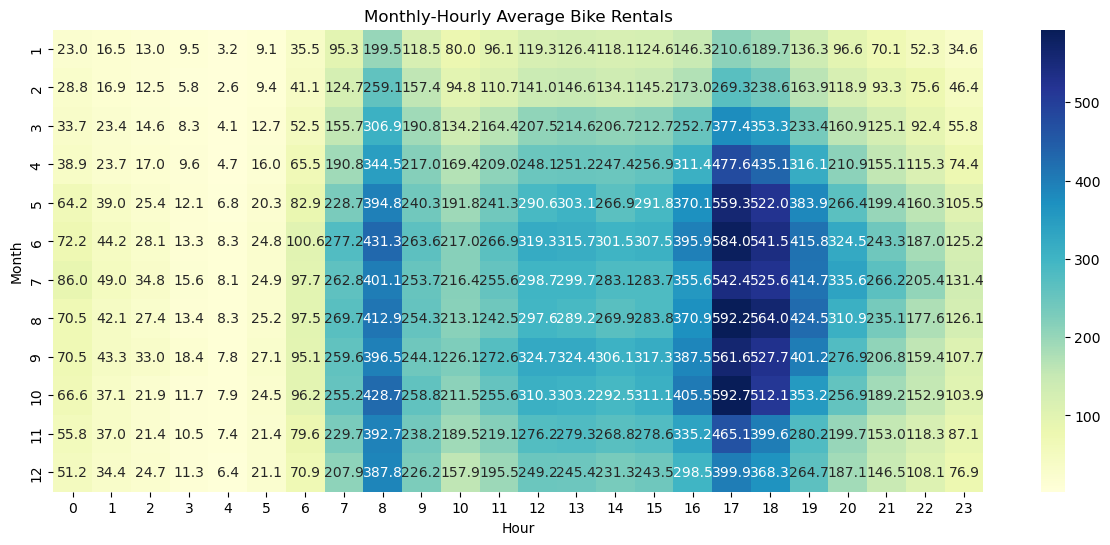

In [50]:
train_df['datetime'] = pd.to_datetime(train_df['datetime'])

train_df['year'] = train_df['datetime'].dt.year
train_df['month'] = train_df['datetime'].dt.month
train_df['hour'] = train_df['datetime'].dt.hour

result = train_df.groupby(['month', 'hour'])['count'].mean().reset_index()
print(result)

pivot = train_df.pivot_table(index='month',
                       columns='hour',
                       values='count',
                       aggfunc='mean')
pivot

import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(15, 6))
sns.heatmap(pivot, annot=True, fmt=".1f", cmap='YlGnBu')
plt.title('Monthly-Hourly Average Bike Rentals')
plt.xlabel('Hour')
plt.ylabel('Month')
plt.show()


#### 결과 : 6~9월(여름), 오전7~19시 사이 -> 자전거의 평균대여량의 증가

#### 오전 5시 대여량이 거의 없음

#### 낮 12시 ~15시 여름에 대여량이 높음.

In [ ]:
import pandas as pd
import numpy as np
train_df['datetime'] = pd.to_datetime(train_df['datetime'])

train_df['year'] = train_df['datetime'].dt.year
train_df['month'] = train_df['datetime'].dt.month
train_df['day'] = train_df['datetime'].dt.day
train_df['hour'] = train_df['datetime'].dt.hour
train_df['weekday'] = train_df['datetime'].dt.weekday
train_df['is_weekend'] = train_df['weekday'].isin([5, 6]).astype(int)

# 시간대 구간
def time_slot(hour):
    if 6 <= hour <= 9:
        return 'morning_peak'
    elif 10 <= hour <= 16:
        return 'daytime'
    elif 17 <= hour <= 20:
        return 'evening_peak'
    else:
        return 'night'

train_df['time_slot'] = train_df['hour'].apply(time_slot)

# 로그변환
train_df['count_log1p'] = np.log1p(train_df['count'])



In [ ]:
train_df.columns

Index(['datetime', 'season', 'holiday', 'workingday', 'weather', 'temp',
       'humidity', 'windspeed', 'count', 'temp_category', 'humidity_category',
       'windspeed_category', 'temp_bin', 'temp_bin_1', 'year', 'month', 'day',
       'hour', 'weekday', 'is_weekend', 'time_slot', 'count_log1p'],
      dtype='object')

모델에 들어갈 데이터 만들기

In [61]:
X = train_df.drop(columns=['datetime','windspeed','count', 'temp_category', 'humidity_category', 'temp_bin', 'temp_bin_1'])

In [62]:
from sklearn.preprocessing import LabelEncoder

scaler = LabelEncoder()
X['time_slot'] = scaler.fit_transform(X['time_slot'])

In [63]:
X = X.drop(columns='count_log1p')

In [64]:
X

,season,holiday,workingday,weather,temp,humidity,windspeed_category,year,month,day,hour,weekday,is_weekend,time_slot
0,1,0,0,1,9.84,81,0,2011,1,1,0,5,1,3
1,1,0,0,1,9.02,80,0,2011,1,1,1,5,1,3
2,1,0,0,1,9.02,80,0,2011,1,1,2,5,1,3
3,1,0,0,1,9.84,75,0,2011,1,1,3,5,1,3
4,1,0,0,1,9.84,75,0,2011,1,1,4,5,1,3
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10881,4,0,1,1,15.58,50,3,2012,12,19,19,2,0,1
10882,4,0,1,1,14.76,57,2,2012,12,19,20,2,0,1
10883,4,0,1,1,13.94,61,2,2012,12,19,21,2,0,3
10884,4,0,1,1,13.94,61,0,2012,12,19,22,2,0,3


In [69]:
y = train_df['count_log1p'] 

데이터 분할 및 모델 학습, 평가

In [85]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.3,random_state=42)

from sklearn.ensemble import RandomForestRegressor
rf = RandomForestRegressor(random_state=0)
rf.fit(X_train, y_train)
pred = rf.predict(X_test)

from sklearn.metrics import r2_score, mean_squared_error
mse = mean_squared_error(y_test, pred)
r2 = r2_score(y_test, pred)
print(np.sqrt(mse),r2)

0.3165271872317178 0.9501274754412776


#### 결과: RMSE는 0.3 r2:0.95의 설명력을 가진다.

In [82]:
from sklearn.metrics import mean_squared_log_error
import numpy as np

# 예측값과 실제값
# pred = rf.predict(X_test)  # 이미 예측해둔 거 그대로 사용하면 됨

# RMSLE 계산
msle = mean_squared_log_error(y_test, pred)
rmsle = np.sqrt(msle)

print("RMSLE:", rmsle)


RMSLE: 0.08587860248433389


In [72]:
from sklearn.model_selection import cross_val_score 
r2_score = cross_val_score(rf, X,y, scoring = 'r2',cv = 5)
r2_score , np.mean(r2_score)

(array([0.74839827, 0.92705543, 0.91618389, 0.93253529, 0.92476666]),
 np.float64(0.8897879085044316))

In [73]:
from sklearn.linear_model import Ridge, Lasso, ElasticNet

In [74]:
ridge = Ridge(alpha= 1.0)
ridge.fit(X_train, y_train)
pred_ridge = ridge.predict(X_test)

from sklearn.metrics import mean_squared_error, r2_score
mse = mean_squared_error(y_test, pred_ridge)
r2  = r2_score(y_test, pred_ridge)
mse, r2

(np.float64(0.7929482237914945), np.float64(0.6052845312923671))

In [75]:
ridge = Lasso(alpha= 1.0)
ridge.fit(X_train, y_train)
pred_lasso = ridge.predict(X_test)

from sklearn.metrics import mean_squared_error, r2_score
mse = mean_squared_error(y_test, pred_ridge)
r2  = r2_score(y_test, pred_ridge)
mse, r2

(np.float64(0.7929482237914945), np.float64(0.6052845312923671))

In [76]:
from sklearn.linear_model import RidgeCV, LassoCV
alphas = [0.001,0.01,0.1,1,10,100]
ridge_cv = RidgeCV(alphas= alphas, cv = 5)
ridge_cv.fit(X_train, y_train)
ridge_preds = ridge_cv.predict(X_test)

from sklearn.metrics import mean_squared_error, r2_score
ridge_mse = mean_squared_error(y_test, ridge_preds)
ridge_r2 = r2_score(y_test, ridge_preds)
print(ridge_mse,ridge_r2)

0.792948231581694 0.6052845274145449


In [77]:
enet = ElasticNet(alpha= 0.1, l1_ratio= 0.5)
enet.fit(X_train, y_train)

enet_pred = enet.predict(X_test)
print(mean_squared_error(y_test, enet_pred))
print(r2_score(y_test, enet_pred))

0.817842868788274
0.5928924214756262
